# $k$ Nearest Neighbours

We classify a new sample according to the majority of classes its neighbours in the training set belong. Here neighbour is defined as the samples closest with regards to the Euclidean norm, also known as the $L_2$ norm. (The sklearn implementation allows for general $L_p$ norms.) The number of neighbours considered, is denoted by $k$. The classifier depends on the choice of $k$. If a small number of neighbours is chosen, then the boundaries between classes are more irregular, while they are smoother, if $k$ is chosen larger.

Change the number of neighbours and observe how the decision boundaries change.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import DecisionBoundaryDisplay

In [2]:
d = datasets.load_iris()
# Iris setosa stored in the first 50 entries.
# Iris versicolor stored in the next 50 entries.
# Iris virginica stored in the next 50 entries.

# Create a classification instance of the SVM.
kNN = KNeighborsClassifier(n_neighbors=5,
                           weights = 'uniform')

# We consider sepal length and width, the first and second features.
# We consider petal length and width, the third and forth features.
# We train on the entire data.
# Number of samples, and therefore species.
# Two: 100,
# Three: 150
n = 150
X = d.data[0:n, 2:4] # Features 3 and 4.
y = d.target[0:n]
# Fit model.
kNN = kNN.fit(X, y)

[[3.  1.1]
 [1.9 0.4]
 [1.9 0.2]
 [3.3 1. ]
 [3.3 1. ]
 [5.  1.5]
 [4.9 1.5]
 [4.9 1.5]
 [5.1 1.5]
 [4.8 1.4]
 [6.1 1.9]
 [5.9 2.1]
 [6.  1.8]
 [5.8 1.8]
 [5.8 2.2]]


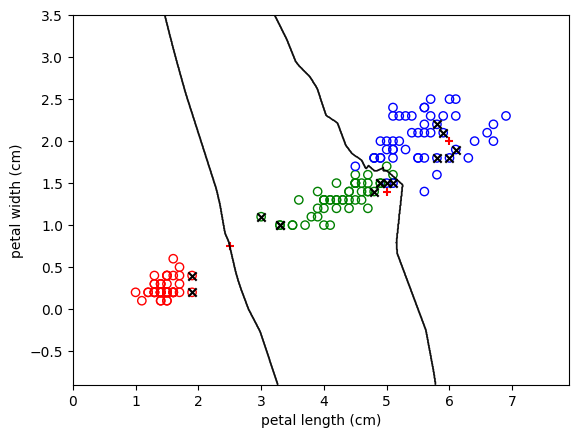

In [3]:
colours = np.repeat(['r'],50)
colours = np.append(colours, np.repeat(['g'],50))
colours = np.append(colours, np.repeat(['b'],50))
# Draw decision boundaries.
disp = DecisionBoundaryDisplay.from_estimator(
    kNN, X, grid_resolution =1000,
    response_method='predict',
    plot_method = 'contour',
    xlabel=d.feature_names[2], ylabel=d.feature_names[3],
    colors = 'k',
    linewidths = 1,
    alpha = 0.5
)
# Display data.
disp.ax_.scatter(X[:,0], X[:,1],
                     facecolors = 'none',
                     edgecolors = colours[0:n])
# New points:.
new_points = np.array([[2.5, 0.75], [5, 1.4], [6, 2]])
# Display new points.
disp.ax_.scatter(new_points[:,0], new_points[:,1],
                 c = 'r', marker = '+')
# Get indices of nearest neighbours.
neighbour_ind = kNN.kneighbors(new_points, return_distance = False)
ind = neighbour_ind.flatten()
# Some neighbours coincide.
print(X[ind,:])
# Display neighbours.
disp.ax_.scatter(X[ind, 0], X[ind,1],
                 c = 'k', marker = 'x')
plt.show()